In [88]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
%matplotlib inline

In [89]:
restViolNT = pd.read_csv('restViolNT.csv')
restViolNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0


In [90]:
dataPoisNT = pd.read_csv('dataPoisNT.csv')
data311compNT = pd.read_csv('data311compNT.csv')
data311compNT.rename(columns={'pois_complaints':'311complaints'}, inplace=True)
dataPoisNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,pois_complaints
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,1.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,69.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,72.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,41.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,59.0


In [91]:
dataPoisNT = dataPoisNT[['boro_ct201', 'pois_complaints']]
data311compNT = data311compNT[['boro_ct201', '311complaints']]

In [92]:
combTemp = restViolNT.merge(dataPoisNT, on='boro_ct201', how='outer')
AllNT = combTemp.merge(data311compNT, on='boro_ct201', how='outer')

AllNT.fillna(value={'rest_Violations':0, 'pois_complaints':0, '311complaints':0}, inplace=True)

AllNT.head()

,Unnamed: 0,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints
0,0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0
1,1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0
2,2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0
3,3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0
4,4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0


In [93]:
AllNT[['Population', 'rest_Violations', 'pois_complaints', '311complaints']].corr()

,Population,rest_Violations,pois_complaints,311complaints
Population,1.000000,0.261593,0.272195,0.316744
rest_Violations,0.261593,1.000000,0.872952,0.865166
pois_complaints,0.272195,0.872952,1.000000,0.860163
311complaints,0.316744,0.865166,0.860163,1.000000


In [94]:
rests = pd.read_csv('Rests.csv')
AllNT = AllNT.merge(rests, on='boro_ct201', how='outer')
AllNT.fillna(value={'Nrestaurants':1}, inplace=True)
AllNT.drop(columns={'Unnamed: 0_x', 'Unnamed: 0_y'}, inplace=True)
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,1.0
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,22.0
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,9.0
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,6.0
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,25.0


In [95]:
AllNT['Nrestaurants'] = AllNT['Nrestaurants']*7

In [96]:
AllNT['violPres'] = AllNT['rest_Violations']/AllNT['Population']
AllNT['311compPres'] = AllNT['311complaints']/AllNT['Population']
AllNT['poisPpop'] = AllNT['pois_complaints']/AllNT['Population']
AllNT.head()

,boro_code,boro_ct201,boro_name,ct2010,geometry,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants,violPres,311compPres,poisPpop
0,5,5000900,Staten Island,900,POLYGON ((-74.07920577013245 40.64343078374567...,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,7.0,0.000000,0.000473,0.000473
1,1,1009800,Manhattan,9800,POLYGON ((-73.96432543478758 40.75638153099091...,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,154.0,0.172089,0.013942,0.009431
2,1,1010000,Manhattan,10000,POLYGON ((-73.96802436915851 40.75957814005282...,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,63.0,0.462349,0.054217,0.036145
3,1,1010200,Manhattan,10200,POLYGON ((-73.97124277307127 40.76093641847906...,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,42.0,2.373913,0.343478,0.178261
4,1,1010400,Manhattan,10400,POLYGON ((-73.97445730550224 40.76229308352487...,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,175.0,1.062112,0.083851,0.061077


In [97]:
AllNT[['rest_Violations', '311complaints', 'pois_complaints']].corr()

,rest_Violations,311complaints,pois_complaints
rest_Violations,1.000000,0.865166,0.872952
311complaints,0.865166,1.000000,0.860163
pois_complaints,0.872952,0.860163,1.000000


In [98]:
AllNT[['Population', 'Nrestaurants']].corr()

,Population,Nrestaurants
Population,1.00000,0.15075
Nrestaurants,0.15075,1.00000


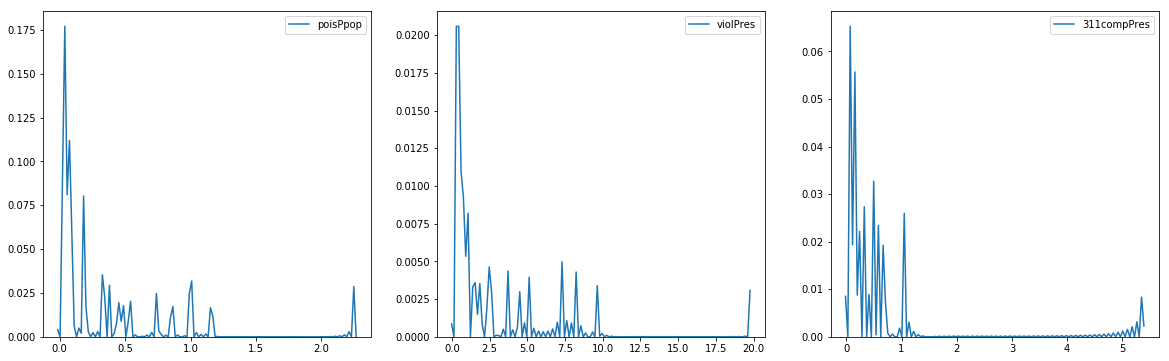

In [99]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(AllNT['poisPpop'], bw=0.005)

ax2 = fig.add_subplot(132)
sns.kdeplot(AllNT['violPres'], bw=0.005)

ax2 = fig.add_subplot(133)
sns.kdeplot(AllNT['311compPres'], bw=0.005)

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


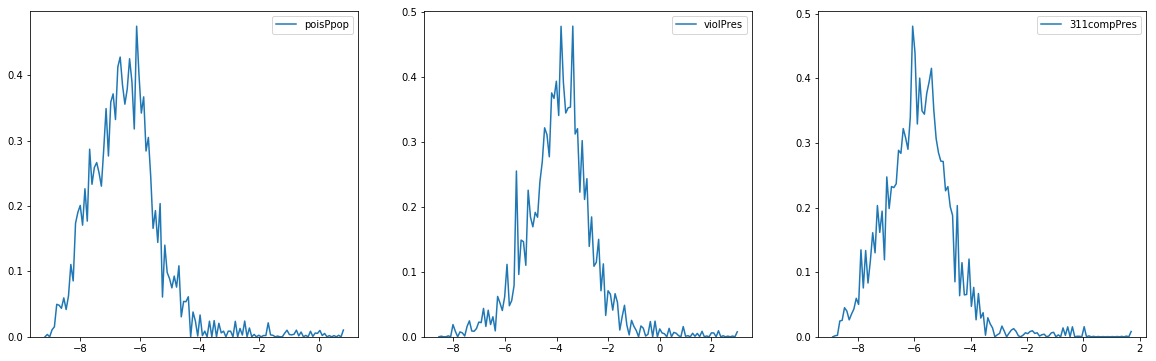

In [100]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.kdeplot(np.log(AllNT['poisPpop']), bw=0.005, ax=ax1)

ax2 = fig.add_subplot(132)
sns.kdeplot(np.log(AllNT['violPres']), bw=0.005, ax=ax2)

ax3 = fig.add_subplot(133)
sns.kdeplot(np.log(AllNT['311compPres']), bw=0.005, ax=ax3)

/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/devashishkhulbe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


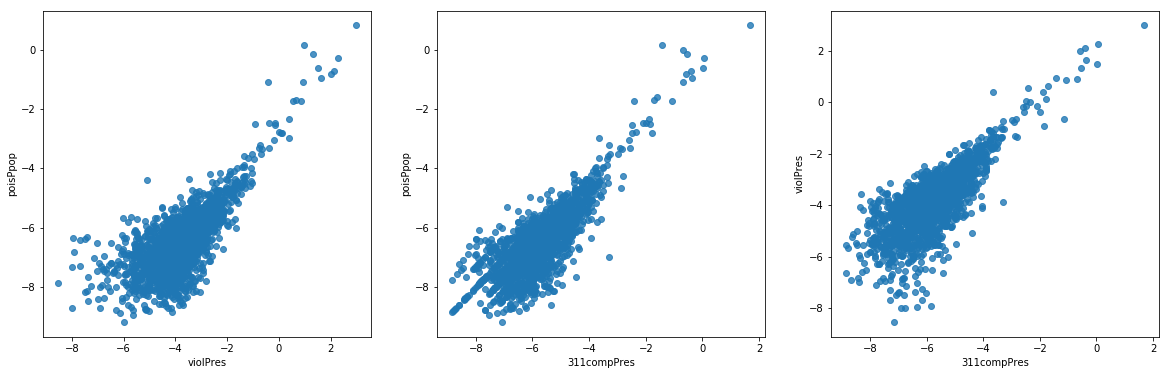

In [101]:
fig = plt.figure(figsize=(20,6))

ax1 = fig.add_subplot(131)
sns.regplot(np.log(AllNT['violPres']), np.log(AllNT['poisPpop']))

ax2 = fig.add_subplot(132)
sns.regplot(np.log(AllNT['311compPres']), np.log(AllNT['poisPpop']))

ax2 = fig.add_subplot(133)
sns.regplot(np.log(AllNT['311compPres']), np.log(AllNT['violPres']))

In [102]:
ct = gpd.read_file('/Users/devashishkhulbe/Downloads/Data/2010 Census Tracts/geo_export_a0d9c6b6-aa01-4614-864e-ae8521d74700.shp')
ct = ct[['boro_ct201', 'geometry']]
ct['boro_ct201'] = ct['boro_ct201'].astype(int)
AllNT.drop(columns={'geometry'}, inplace=True)
ct.head()

,boro_ct201,geometry
0,5000900,POLYGON ((-74.07920577013245 40.64343078374567...
1,1009800,POLYGON ((-73.96432543478758 40.75638153099091...
2,1010000,POLYGON ((-73.96802436915851 40.75957814005282...
3,1010200,POLYGON ((-73.97124277307127 40.76093641847906...
4,1010400,POLYGON ((-73.97445730550224 40.76229308352487...


In [103]:
AllNT = ct.merge(AllNT, on='boro_ct201')
crs = {'init': 'epsg:4326'}
AllNT = gpd.GeoDataFrame(AllNT, crs=crs, geometry='geometry')

In [105]:
NrestWviol = pd.read_csv('NrestWviol.csv')
NrestWviol.drop(columns={'Unnamed: 0'}, inplace=True)
NrestWviol.head()

,NrestWviol,boro_ct201
0,118,1009800
1,97,1010000
2,69,1010200
3,104,1010400
4,120,1011300


In [106]:
AllNT = AllNT.merge(NrestWviol, on='boro_ct201', how='outer')
AllNT.fillna(value={'NrestWviol':0}, inplace=True)
AllNT.head()

,boro_ct201,geometry,boro_code,boro_name,ct2010,shape_area,bct,Year,Borough,Population,rest_Violations,pois_complaints,311complaints,Nrestaurants,violPres,311compPres,poisPpop,NrestWviol
0,5000900,POLYGON ((-74.07920577013245 40.64343078374567...,5,Staten Island,900,2.497010e+06,5900,2010,Staten Island,2112,0.0,1.0,1.0,7.0,0.000000,0.000473,0.000473,0.0
1,1009800,POLYGON ((-73.96432543478758 40.75638153099091...,1,Manhattan,9800,1.906016e+06,19800,2010,Manhattan,7316,1259.0,69.0,102.0,154.0,0.172089,0.013942,0.009431,118.0
2,1010000,POLYGON ((-73.96802436915851 40.75957814005282...,1,Manhattan,10000,1.860938e+06,110000,2010,Manhattan,1992,921.0,72.0,108.0,63.0,0.462349,0.054217,0.036145,97.0
3,1010200,POLYGON ((-73.97124277307127 40.76093641847906...,1,Manhattan,10200,1.860993e+06,110200,2010,Manhattan,230,546.0,41.0,79.0,42.0,2.373913,0.343478,0.178261,69.0
4,1010400,POLYGON ((-73.97445730550224 40.76229308352487...,1,Manhattan,10400,1.864600e+06,110400,2010,Manhattan,966,1026.0,59.0,81.0,175.0,1.062112,0.083851,0.061077,104.0


In [110]:
AllNT = AllNT[AllNT.Population != 0]
AllNT['ViolProp'] = AllNT['NrestWviol']/AllNT['Population']
AllNT[['violPres', '311compPres', 'poisPpop', 'NrestWviol', 'ViolProp']].corr()

,violPres,311compPres,poisPpop,NrestWviol,ViolProp
violPres,1.000000,0.914012,0.820225,0.221310,0.974118
311compPres,0.914012,1.000000,0.828200,0.106173,0.829118
poisPpop,0.820225,0.828200,1.000000,0.104969,0.801291
NrestWviol,0.221310,0.106173,0.104969,1.000000,0.249875
ViolProp,0.974118,0.829118,0.801291,0.249875,1.000000


In [81]:
AllNT = AllNT[AllNT.Population != 0]
AllNT['violPres'] = (AllNT['violPres'] - AllNT['violPres'].mean())/AllNT['violPres'].std()
AllNT['311compPres'] = (AllNT['311compPres'] - AllNT['311compPres'].mean())/AllNT['311compPres'].std()

In [82]:
AllNT[['violPres', '311compPres', 'poisPpop', 'NrestWviol', 'ViolProp']].corr()

,violPres,311compPres,poisPpop,NrestWviol,ViolProp
violPres,1.000000,0.914012,0.820225,0.221310,0.974118
311compPres,0.914012,1.000000,0.828200,0.106173,0.829118
poisPpop,0.820225,0.828200,1.000000,0.104969,0.801291
NrestWviol,0.221310,0.106173,0.104969,1.000000,0.249875
ViolProp,0.974118,0.829118,0.801291,0.249875,1.000000


In [112]:
AllNT['violPres'].describe()

count    2140.000000
mean        0.068046
std         0.571668
min         0.000000
25%         0.005407
50%         0.017107
75%         0.036011
max        19.750000
Name: violPres, dtype: float64

In [113]:
AllNT.to_file('NT/AllNT.shp')